In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [79]:
#After integrating the data by year, extract the columns.
health_by_year = []

for year in range(2013,2023):
    health_1 = f"국민건강보험공단_건강검진정보_{year}-1.csv"
    health_2 = f"국민건강보험공단_건강검진정보_{year}-2.csv"
    
    df1 = pd.read_csv(health_1, encoding='cp949', low_memory=False, \
                      usecols=['기준년도', '연령대코드(5세단위)', '구강검진 수검여부', '치아우식증유무'])
    df2 = pd.read_csv(health_2, encoding='cp949', low_memory=False, \
                      usecols=['기준년도', '연령대코드(5세단위)', '구강검진 수검여부', '치아우식증유무'])
    
    merged_df = pd.concat([df1,df2])
    sorted_df = merged_df.sort_values(by='연령대코드(5세단위)', ascending=True)
    
    health_by_year.append((year, sorted_df))

In [80]:
#labeling data frame
for i, year_data in enumerate(health_by_year, start=2013):
    globals()[f'health{i}'] = year_data[1]

In [83]:
#Extract only those who have received oral examinations.
for year in range(2013, 2023):
    df_name = f"health{year}"
    exec(f"{df_name} = {df_name}[({df_name}['구강검진 수검여부'] == 'Y') | ({df_name}['구강검진 수검여부'] == 1)]")
    
#Adjust the values according to the updated format since 2014.
health2013['연령대코드(5세단위)'] += 4

In [87]:
#Replace the age group code with the actual age.(example for 2013)
health2013['연령대코드(5세단위)'] = health2013['연령대코드(5세단위)'].astype(int)

health2013['a'] = (health2013['연령대코드(5세단위)'] - 1) * 5
health2013['b'] = (health2013['연령대코드(5세단위)'] - 1) * 5 + 4

health2013['연령대코드(5세단위)'] = health2013['a'].astype(str) + '-' + health2013['b'].astype(str)

health2013.drop(['a', 'b'], axis=1, inplace=True)

In [92]:
# repeat from 2014 to 2022
for year in range(2014, 2023):
    df_name = f"health{year}"
    exec(f"{df_name}['연령대코드(5세단위)'] = {df_name}['연령대코드(5세단위)'].astype(int)")
    
    exec(f"{df_name}['a'] = ({df_name}['연령대코드(5세단위)'] - 1) * 5")
    exec(f"{df_name}['b'] = ({df_name}['연령대코드(5세단위)'] - 1) * 5 + 4")

    exec(f"{df_name}['연령대코드(5세단위)'] = {df_name}['a'].astype(str) + '-' + {df_name}['b'].astype(str)")

    exec(f"{df_name}.drop(['a', 'b'], axis=1, inplace=True)")

In [118]:
for year in range(2013, 2023):
    df_name = f"health{year}"
    exec(f"{df_name} = {df_name}[~{df_name}['치아우식증유무'].isna()]")
    
### 2016 and 2017 has no data for column '치아우식증유무(dental carries)' ###

In [ ]:
#To unify the values of the "dental carries" column as Y/N.
for year in range(2013, 2023):
    df_name = f"health{year}"
    exec(f"{df_name}['치아우식증유무'].replace({{1.0: 'Y', 0.0: 'N'}}, inplace=True)")

In [138]:
#rename the column'연령대코드(5세단위)' -> '나이'
for year in range(2013, 2023):
    df_name = f"health{year}"
    globals()[df_name].rename(columns={'연령대코드(5세단위)': '나이'}, inplace=True)

In [148]:
#Counting the number of people by age.
for year in range(2013, 2023):
    df_name = f"health{year}"
    
    age_values = eval(f"{df_name}['나이'].unique()")
    age_column_counts = {}
    
    for age_value in age_values:
        num_columns = (eval(f"{df_name}['나이'] == age_value")).sum()
        age_column_counts[age_value] = num_columns
    
    print(f"Year {year}: {age_column_counts}")

Year 2013: {'40-44': 13089, '45-49': 37150, '50-54': 49808, '55-59': 38712, '60-64': 58377, '65-69': 43960, '70-74': 48510, '75-79': 34153, '80-84': 25582, '85-89': 14986, '90-94': 13140, '95-99': 4410, '100-104': 1676, '105-109': 254}
Year 2014: {'20-24': 4751, '25-29': 12709, '30-34': 16558, '35-39': 13286, '40-44': 17023, '45-49': 11688, '50-54': 12029, '55-59': 8096, '60-64': 6026, '65-69': 3271, '70-74': 2992, '75-79': 1050, '80-84': 495, '85-89': 74}
Year 2015: {'20-24': 4249, '25-29': 11597, '30-34': 15273, '35-39': 12651, '40-44': 16100, '45-49': 11695, '50-54': 11359, '55-59': 7828, '60-64': 6047, '65-69': 3322, '70-74': 2846, '75-79': 1122, '80-84': 470, '85-89': 70}
Year 2016: {}
Year 2017: {}
Year 2018: {'20-24': 10856, '25-29': 35161, '30-34': 41525, '35-39': 43172, '40-44': 51357, '45-49': 47472, '50-54': 50088, '55-59': 41096, '60-64': 36080, '65-69': 17812, '70-74': 15038, '75-79': 6680, '80-84': 3219, '85-89': 436}
Year 2019: {'20-24': 16291, '25-29': 37374, '30-34': 4

In [151]:
#Counting the number of people who have dental carries by age.
for year in range(2013, 2023):
    df_name = globals()[f"health{year}"]  
    age_values = df_name['나이'].unique()
    
    print(f"For {year}:")
    for age_value in age_values:
        same_age_rows = df_name[df_name['나이'] == age_value]
        num_y_values = same_age_rows['치아우식증유무'].eq('Y').sum()
        
        print(f"For age {age_value}, the number of people with 'Y' in the 'dental carries' column is: {num_y_values}")

For 2013:
For age 40-44, the number of people with 'Y' in the 'dental carries' column is: 4452
For age 45-49, the number of people with 'Y' in the 'dental carries' column is: 11469
For age 50-54, the number of people with 'Y' in the 'dental carries' column is: 15165
For age 55-59, the number of people with 'Y' in the 'dental carries' column is: 10723
For age 60-64, the number of people with 'Y' in the 'dental carries' column is: 14521
For age 65-69, the number of people with 'Y' in the 'dental carries' column is: 9670
For age 70-74, the number of people with 'Y' in the 'dental carries' column is: 10043
For age 75-79, the number of people with 'Y' in the 'dental carries' column is: 6435
For age 80-84, the number of people with 'Y' in the 'dental carries' column is: 4651
For age 85-89, the number of people with 'Y' in the 'dental carries' column is: 2679
For age 90-94, the number of people with 'Y' in the 'dental carries' column is: 2410
For age 95-99, the number of people with 'Y' in th

For age 30-34, the number of people with 'Y' in the 'dental carries' column is: 8347
For age 35-39, the number of people with 'Y' in the 'dental carries' column is: 6835
For age 40-44, the number of people with 'Y' in the 'dental carries' column is: 8325
For age 45-49, the number of people with 'Y' in the 'dental carries' column is: 5898
For age 50-54, the number of people with 'Y' in the 'dental carries' column is: 6324
For age 55-59, the number of people with 'Y' in the 'dental carries' column is: 4148
For age 60-64, the number of people with 'Y' in the 'dental carries' column is: 4142
For age 65-69, the number of people with 'Y' in the 'dental carries' column is: 2106
For age 70-74, the number of people with 'Y' in the 'dental carries' column is: 1634
For age 75-79, the number of people with 'Y' in the 'dental carries' column is: 696
For age 80-84, the number of people with 'Y' in the 'dental carries' column is: 505
For age 85-89, the number of people with 'Y' in the 'dental carries

In [164]:
#The proportion of dental caries by age group is shown by year in percentage.
years = range(2013, 2023)
unique_ages = sorted(set(age_value for year in years for age_value in globals()[f"health{year}"]['나이'].unique()))

dental_df = pd.DataFrame(index=years, columns=unique_ages)


for year in years:
    df = globals()[f"health{year}"]
    total_population = len(df)
    
    for age_value in unique_ages:
        same_age_rows = df[df['나이'] == age_value]
        num_y_values = same_age_rows['치아우식증유무'].eq('Y').sum()
        
        percentage = (num_y_values / len(same_age_rows)) * 100 if len(same_age_rows) > 0 else 0
        dental_df.at[year, age_value] = percentage
        
# Replace 0 values with NaN
dental_df.replace(0, np.nan, inplace=True)        

#Moving columns
columns_to_move = ['100-104', '105-109']
dental_df = dental_df[[col for col in result_df.columns if col not in columns_to_move] + columns_to_move]

dental_df

,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100-104,105-109
2013,NaN,NaN,NaN,NaN,34.013294,30.872140,30.446916,27.699421,24.874523,21.997270,20.702948,18.841683,18.180752,17.876685,18.340944,19.274376,18.615752,23.228346
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,28.233235,27.726743,27.886815,26.799778,23.295753,20.546849,17.754752,16.673156,16.092018,15.259376,15.760074,16.751497,16.930724,18.119266,NaN,NaN,NaN,NaN
2019,27.235897,25.988655,26.768570,26.453608,22.846829,20.206615,17.426570,16.169384,15.172451,14.583706,15.124709,16.585058,17.971429,18.577075,NaN,NaN,NaN,NaN
2020,23.802301,24.081077,24.802591,24.059594,21.659238,18.856696,16.480011,14.956967,14.772761,13.164210,13.276857,14.826877,15.909091,17.578125,NaN,NaN,NaN,NaN
2021,21.201926,22.381542,22.936232,23.087130,20.833142,18.447051,15.952501,14.236616,14.218783,12.990851,12.581491,13.954345,14.522472,16.554054,NaN,NaN,NaN,NaN
2022,19.534381,20.613560,21.202499,21.656475,19.522090,17.084758,14.978683,13.362111,12.675582,11.952327,11.707387,12.747253,13.700488,15.772871,NaN,NaN,NaN,NaN


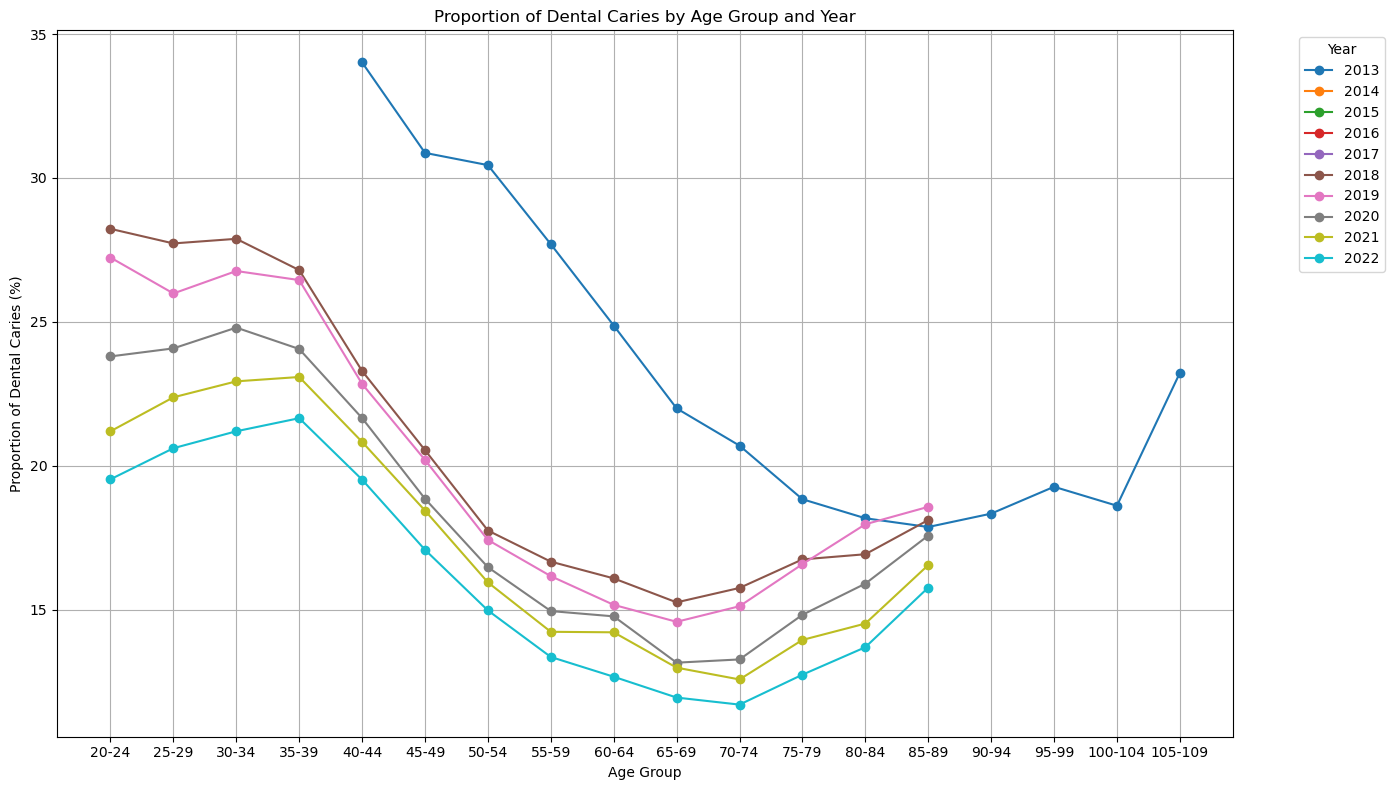

In [165]:
plt.figure(figsize=(14, 8))

for year in years:
    plt.plot(dental_df.columns, dental_df.loc[year], label=str(year), marker='o')

plt.xlabel('Age Group')
plt.ylabel('Proportion of Dental Caries (%)')
plt.title('Proportion of Dental Caries by Age Group and Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()